In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme()

penguins = sns.load_dataset('penguins').dropna()
print(penguins.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
4       3450.0  Female  
5       3650.0    Male  


In [3]:
gentoo = penguins[penguins.species == 'Gentoo']
adelie = penguins[penguins.species == 'Adelie']
chinstrap = penguins[penguins.species == 'Chinstrap']

In [4]:
adelie_m = adelie[adelie.sex == "Male"]
adelie_f = adelie[adelie.sex == "Female"]

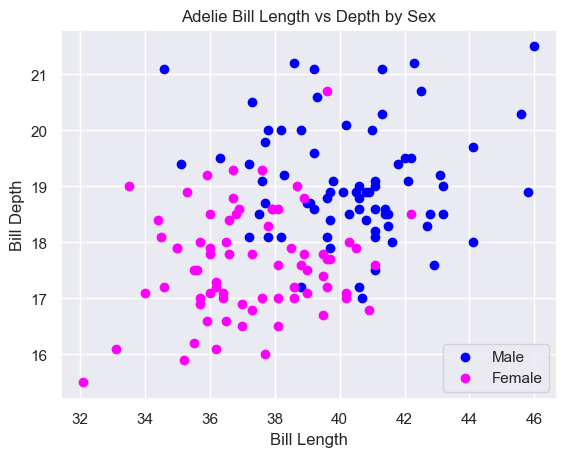

In [5]:
plt.scatter(
    adelie_m.bill_length_mm, adelie_m.bill_depth_mm, color="blue", label="Male"
)
plt.scatter(adelie_f.bill_length_mm, adelie_f.bill_depth_mm, color="magenta", label="Female")
plt.xlabel('Bill Length')
plt.ylabel('Bill Depth')
plt.title('Adelie Bill Length vs Depth by Sex')
plt.legend()

plt.show()

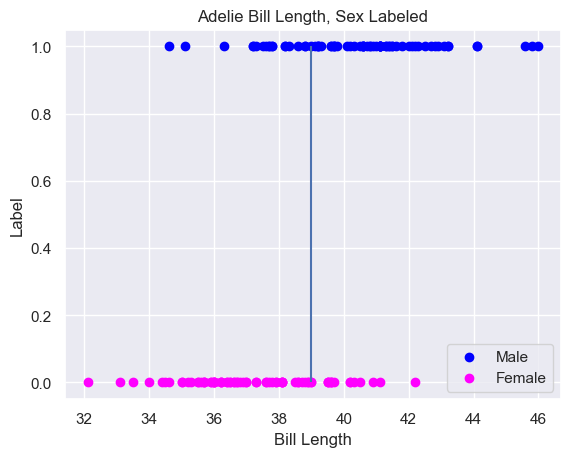

In [6]:
plt.scatter(
    adelie_m.bill_length_mm, np.ones(adelie_m.shape[0]), color="blue", label="Male"
)
plt.scatter(adelie_f.bill_length_mm, np.zeros(adelie_f.shape[0]), color="magenta", label="Female")
plt.xlabel('Bill Length')
plt.ylabel('Label')
plt.title('Adelie Bill Length, Sex Labeled')
plt.vlines(39, 0, 1)
plt.legend()

plt.show()

In [7]:
def sigmoid_preactivation(z):
    return 1 / (1 + np.exp(-z))

In [8]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        
        self.w = np.random.rand(X.shape[1])
        self.b = np.random.rand()
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            agg_cost = 0
            for x_i, y_i in zip(X, y):
                iter_error = (self.predict(x_i) - y_i)
                self.w -= alpha*iter_error*x_i
                self.b -= alpha*iter_error
                agg_cost += self.cost_function(self.predict(x_i), y_i)
            self.errors_.append(agg_cost/N)
        
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w) + self.b
        return self.activation_function(preactivation)

    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

In [9]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

In [10]:
X = adelie.bill_length_mm.values.reshape(-1, 1)
y = np.where(adelie.sex == "Female", 0, 1)

In [11]:
node = SingleNeuron(sigmoid_preactivation, cross_entropy_loss)

In [12]:
node.train(X, y, alpha = 0.01, epochs = 10000)

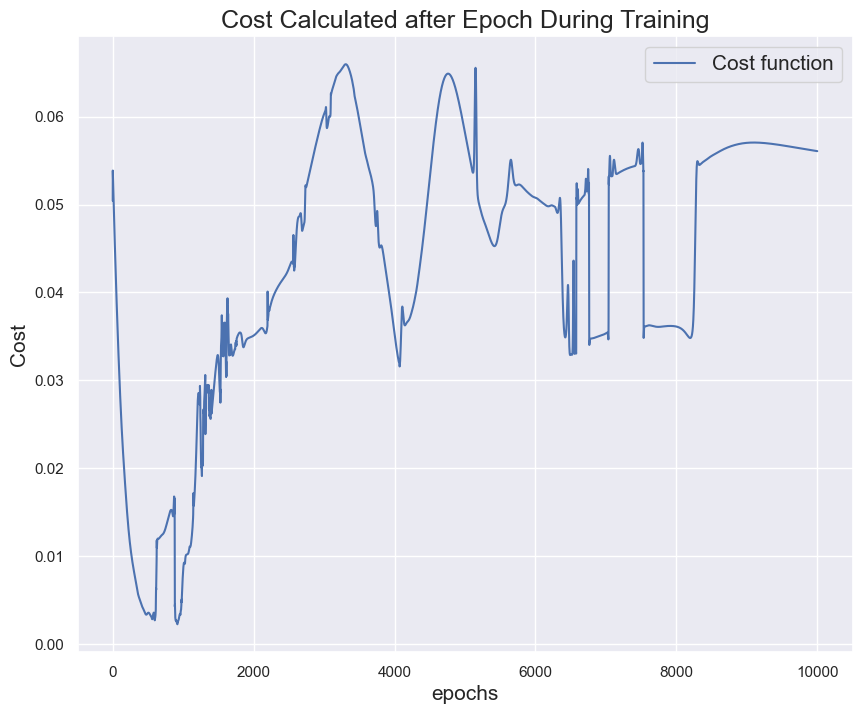

In [13]:
node.plot_cost_function()

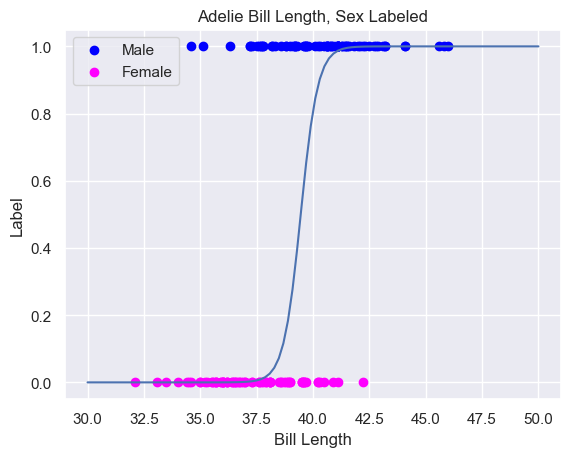

In [14]:
plt.scatter(
    adelie_m.bill_length_mm, np.ones(adelie_m.shape[0]), color="blue", label="Male"
)
plt.scatter(adelie_f.bill_length_mm, np.zeros(adelie_f.shape[0]), color="magenta", label="Female")
plt.xlabel('Bill Length')
plt.ylabel('Label')
plt.title('Adelie Bill Length, Sex Labeled')
domain = np.linspace(30, 50, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.legend()
plt.show()

In [15]:
np.rint(node.predict(X)) != y

array([ True,  True,  True, False,  True, False,  True,  True,  True,
        True, False, False, False, False, False, False,  True, False,
        True,  True, False, False,  True, False, False,  True,  True,
        True, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False,  True, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
        True, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,

In [16]:
bin_class_error = (np.rint(node.predict(X)) != y).astype(int)
class_error = sum(bin_class_error) / len(y)
print(class_error)

0.2602739726027397
